In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/1e7datasetcorr.csv', index_col=0)
df.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,Omega3,f3,x3,y3,z3,vx3,vy3,vz3,Rel_Eerr,integ_time
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4995,True,1.000000e+07,10000000.0,0.000015,0.021544,0.053729,0.012454,0.005642,-1.657512,0.012805,...,-2.455928,-0.162476,0.008390,-0.073445,0.000225,23.145675,2.707954,0.045366,2.622256e-09,1437.494908
4996,True,1.000000e+07,10000000.0,0.000015,0.021544,0.056524,0.013439,0.003143,0.454508,0.016073,...,2.849398,1.906923,-0.025937,0.072181,-0.000593,-21.424946,-7.242948,0.126097,1.469989e-08,1502.892072
4997,True,1.000000e+07,10000000.0,0.000015,0.021544,0.058060,0.013990,0.009825,-0.543930,0.013198,...,1.792055,0.982644,-0.007582,0.076548,-0.000043,-22.647292,-2.002117,0.103816,7.680985e-09,1408.293117
4998,False,2.365555e+05,10000000.0,0.000015,0.021544,0.052558,0.012049,0.003733,-3.677540,0.004648,...,-3.022916,0.840517,0.031328,-0.060568,0.000609,21.634522,10.844146,-0.078264,6.473084e-07,33.453553
4999,False,1.997705e+04,10000000.0,0.000015,0.021544,0.051719,0.011762,0.015866,1.766786,0.011312,...,-1.104623,2.694640,0.067710,0.016891,0.000328,-5.630598,22.998094,0.025569,8.613444e-07,3.079377


In [2]:
df['Pratio21'] = df['P2']/df['P1']
df['Pratio32'] = df['P3']/df['P2']

In [3]:
df['logNorbits'] = np.log10(df['Norbits_instability'])

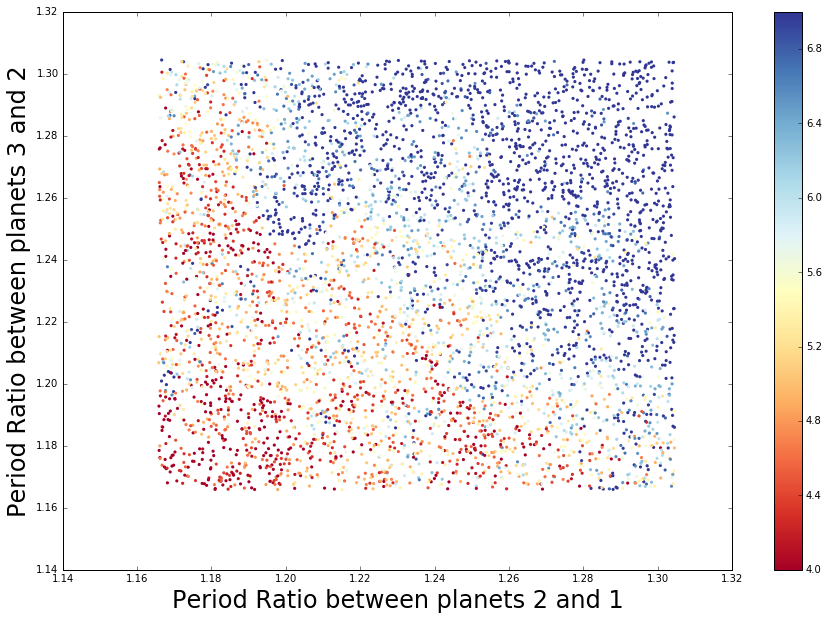

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(df['Pratio21'], df['Pratio32'], c=df['logNorbits'], edgecolor='', vmin=4, vmax=7, s=10,cmap=cm)
ax.set_xlabel('Period Ratio between planets 2 and 1', fontsize=24)
ax.set_ylabel('Period Ratio between planets 3 and 2', fontsize=24)
plt.colorbar(sc)

In [5]:
df['beta1'] = (df['a2']-df['a1'])/df['a1']/df['RH/a']
df['beta2'] = (df['a3']-df['a2'])/df['a2']/df['RH/a']

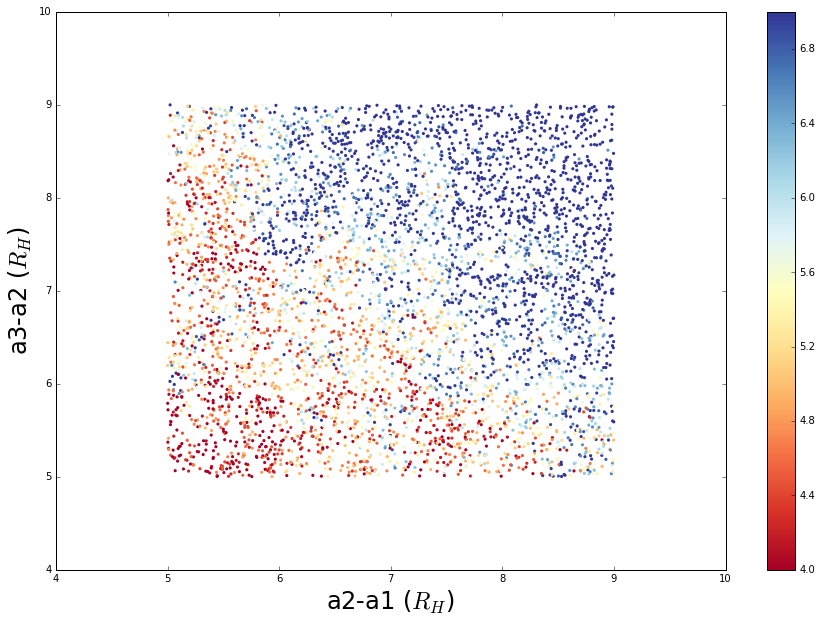

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(df['beta1'], df['beta2'], c=df['logNorbits'], edgecolor='', vmin=4, vmax=7, s=10,cmap=cm)
ax.set_xlabel('a2-a1 ($R_H$)', fontsize=24)
ax.set_ylabel('a3-a2 ($R_H$)', fontsize=24)
plt.colorbar(sc)